In [50]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import geopandas as gpd
from shapely.geometry import Point
import fiona
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Read Subway Data

In [51]:
sub17 = pd.read_csv('Turnstile_Usage_Data__2017.csv')
#sub15 = pd.read_csv('https://data.ny.gov/api/views/ug6q-shqc/rows.csv?accessType=DOWNLOAD')

In [52]:
df1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_140104.txt") 
df2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_150103.txt")

In [53]:
df2.shape

(194113, 11)

In [54]:
df1.columns = ['C/A', 'Unit', 'SCP', 'Date1', 'Time1', 'Type',
       'Entries1', 'Exits1', 'Date2', 'Time2', 'Type',
       'Entries2', 'Exits2', 'Date3', 'Time3', 'Type',
       'Entries3', 'Exits3', 'Date4', 'Time4', 'Type',
       'Entries4', 'Exits4', 'Date5', 'Time5', 'Type',
       'Entries5', 'Exits5', 'Date6', 'Time6', 'Type',
       'Entries6', 'Exits6', 'Date7', 'Time7', 'Type',
       'Entries7', 'Exits7', 'Date8', 'Time8', 'Type',
       'Entries8', 'Exits8']

In [55]:
t1 = df1[['C/A', 'Unit', 'SCP', 'Date1', 'Time1','Entries1', 'Exits1']]
t2 = df1[['C/A', 'Unit', 'SCP', 'Date2', 'Time2','Entries2', 'Exits2']]
t3 = df1[['C/A', 'Unit', 'SCP', 'Date3', 'Time3','Entries3', 'Exits3']]
t4 = df1[['C/A', 'Unit', 'SCP', 'Date4', 'Time4','Entries4', 'Exits4']]
t5 = df1[['C/A', 'Unit', 'SCP', 'Date5', 'Time5','Entries5', 'Exits5']]
t6 = df1[['C/A', 'Unit', 'SCP', 'Date6', 'Time6','Entries6', 'Exits6']]
t7 = df1[['C/A', 'Unit', 'SCP', 'Date7', 'Time7','Entries7', 'Exits7']]
t8 = df1[['C/A', 'Unit', 'SCP', 'Date8', 'Time8','Entries8', 'Exits8']]

In [56]:
t1.columns = ['C/A', 'Unit', 'SCP', 'Date', 'Time','Entries', 'Exits']
t2.columns = ['C/A', 'Unit', 'SCP', 'Date', 'Time','Entries', 'Exits']
t3.columns = ['C/A', 'Unit', 'SCP', 'Date', 'Time','Entries', 'Exits']
t4.columns = ['C/A', 'Unit', 'SCP', 'Date', 'Time','Entries', 'Exits']
t5.columns = ['C/A', 'Unit', 'SCP', 'Date', 'Time','Entries', 'Exits']
t6.columns = ['C/A', 'Unit', 'SCP', 'Date', 'Time','Entries', 'Exits']
t7.columns = ['C/A', 'Unit', 'SCP', 'Date', 'Time','Entries', 'Exits']
t8.columns = ['C/A', 'Unit', 'SCP', 'Date', 'Time','Entries', 'Exits']

In [57]:
test = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8]).dropna(how='any')

In [58]:
test['Date'] = pd.to_datetime(test['Date'])

In [59]:
test = test[test.Date>='01/01/14']

In [60]:
df2['DATE'] = pd.to_datetime(df2['DATE'])

In [61]:
df2 = df2[df2.DATE<='12/31/14']

In [62]:
df2.columns = ['C/A', 'Unit', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'Date', 'Time',
       'DESC', 'Entries',
       'Exits']

In [63]:
df2 = df2[['C/A', 'Unit', 'SCP', 'Date', 'Time','Entries','Exits']]

In [64]:
sub14 = pd.concat([test,df2]).dropna(how='any')

In [65]:
sub17.columns = ['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries','Exits']

In [66]:
sub17 = sub17[['C/A', 'Unit', 'SCP', 'Date','Time', 'Entries','Exits']]

In [67]:
sub_en17 = (sub17.groupby(['Unit','SCP']).Entries.max()-sub17.groupby(['Unit','SCP']).Entries.min()).unstack().fillna(0)
sub_en14 = (sub14.groupby(['Unit','SCP']).Entries.max()-sub14.groupby(['Unit','SCP']).Entries.min()).unstack().fillna(0)

sub_ex17 = (sub17.groupby(['Unit','SCP']).Exits.max()-sub17.groupby(['Unit','SCP']).Exits.min()).unstack().fillna(0)
sub_ex14 = (sub14.groupby(['Unit','SCP']).Exits.max()-sub14.groupby(['Unit','SCP']).Exits.min()).unstack().fillna(0)

In [68]:
df = pd.DataFrame(data={'en17':sub_en17.sum(axis=1),'en14':sub_en14.sum(axis=1),
                       'ex17':sub_ex17.sum(axis=1),'ex14':sub_ex14.sum(axis=1)})

In [69]:
df = df.reset_index()

In [70]:
df.columns = ['Unit','en17', 'en14', 'ex17', 'ex14']

In [71]:
df.en14.corr(df.en17)

0.19668657554475852

In [72]:
df = df.dropna(how='any')

In [73]:
df.head()

,Unit,en17,en14,ex17,ex14
0,R001,16099202.0,12567442.0,16133708.0,11294051.0
1,R003,456377.0,434613.0,295786.0,276293.0
2,R004,3525332.0,1063199.0,2941673.0,692688.0
3,R005,1192892.0,1066179.0,753750.0,509384.0
4,R006,35083549.0,68156375.0,889542.0,50992947.0


In [74]:
df.to_csv('subway14_17.csv')

## Saving point 1

In [75]:
df_ = pd.read_csv('subway14_17.csv')
del df_['Unnamed: 0']

# Read taxi zone shapefile

In [76]:
zipcode = gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')

In [77]:
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [78]:
zipcode.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

In [79]:
zipcode = zipcode[['ZIPCODE', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'SHAPE_AREA', 'SHAPE_LEN','geometry']]

In [80]:
geo = pd.read_csv("https://raw.githubusercontent.com/chriswhong/nycturnstiles/master/geocoded.csv",header=None)
geo.columns = ["REMOTE","VALUES","NAME","Z","SRT","LAT","LONG"] #Made up these names but should change them

In [81]:
subway = pd.merge(geo, df_, how="outer", left_on="REMOTE",right_on="Unit")

In [82]:
subway.dropna(how='any',inplace=True)

In [83]:
#taxi_zones = gpd.read_file('taxi_zones/taxi_zones.shp')
crs = {'init' :'epsg:4326'}
geometry_ = [Point(xy) for xy in zip(subway.LONG, subway.LAT)]

In [84]:
subway_gdf = gpd.GeoDataFrame(subway, geometry=geometry_, crs=crs)
zipcode = zipcode.to_crs(epsg=4326)
subway_gdf = gpd.sjoin(subway_gdf, zipcode, how="right", op='within')

In [85]:
subway_gdf = subway_gdf.reset_index().dropna(how='any')

In [86]:
subway_gdf.columns

Index(['index_right', 'index_left', 'REMOTE', 'VALUES', 'NAME', 'Z', 'SRT',
       'LAT', 'LONG', 'Unit', 'en17', 'en14', 'ex17', 'ex14', 'ZIPCODE',
       'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry'],
      dtype='object')

In [87]:
subway_gdf = subway_gdf[['REMOTE', 'LAT', 'LONG', 'Unit', 'en14', 'en17', 'ex14', 'ex17', 
                         'ZIPCODE','PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 
                         'SHAPE_AREA','SHAPE_LEN', 'geometry']]

In [88]:
tmp1 = subway_gdf.groupby('ZIPCODE').sum()[['en14','en17','ex14','ex17']].reset_index()

In [89]:
tmp2 = subway_gdf[['REMOTE', 'LAT', 'LONG', 'ZIPCODE','PO_NAME', 'POPULATION', 'AREA', 'COUNTY', 
                 'SHAPE_AREA','SHAPE_LEN', 'geometry']].drop_duplicates('ZIPCODE')

In [90]:
subway_gdf = pd.merge(tmp1,tmp2,on='ZIPCODE',how='left')

In [91]:
subway_gdf.columns

Index(['ZIPCODE', 'en14', 'en17', 'ex14', 'ex17', 'REMOTE', 'LAT', 'LONG',
       'PO_NAME', 'POPULATION', 'AREA', 'COUNTY', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

In [232]:
subway_gdf['en_change'] = np.log(subway_gdf['en17'])/np.log(subway_gdf['en14'])

In [233]:
subway_gdf['ex_change'] = np.log(subway_gdf['ex17'])/np.log(subway_gdf['ex14'])

In [234]:
test = pd.merge(subway_gdf[['ZIPCODE','en_change','ex_change']], zipcode, how="right")

In [235]:
test = gpd.GeoDataFrame(test, crs=crs)

In [236]:
test = test.dropna(how='any')

In [157]:
#test = test[(test.en_change>-50) & (test.ex_change>-50)]

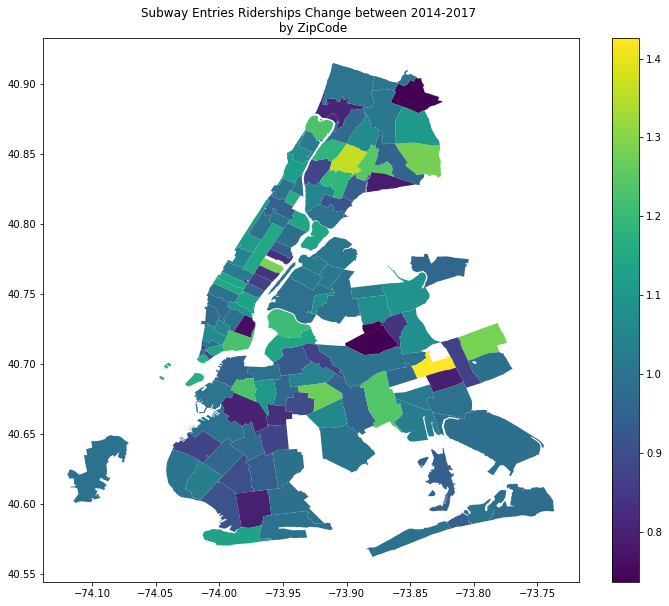

In [244]:
f, ax = plt.subplots(figsize=(12,10))
test.plot(ax=ax, column = 'en_change',legend=True);
plt.title('Subway Entries Riderships Change between 2014-2017 \n by ZipCode')

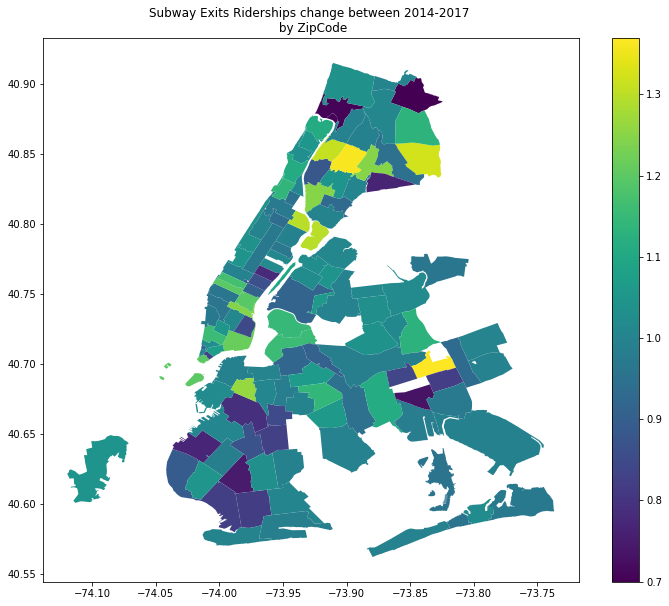

In [243]:
f, ax = plt.subplots(figsize=(12,10))
test.plot(ax=ax, column = 'ex_change',legend=True);
plt.title('Subway Exits Riderships change between 2014-2017 \n by ZipCode')